In [94]:
import pandas as pd

In [109]:
df_sets_brickset = pd.read_csv('sets-brickset.csv')

# change number to bricklink format
df_sets_brickset['Number'] = [
    f'{number}-{variant}' for number, variant 
    in zip(df_sets_brickset['Number'], df_sets_brickset['Variant'])
]

# change column names, filter columns
df_sets_brickset = df_sets_brickset.rename(
    columns={col: col.lower() for col in list(df_sets_brickset)}
)[['number', 'theme', 'year', 'name', 'minifigs', 'pieces', 'usprice']]

# make NaN minifigs 0.0
df_sets_brickset = df_sets_brickset.fillna(value={'minifigs': 0.0})

# set types
df_sets_brickset = df_sets_brickset.astype({
    'number': 'str',
    'year': 'str'
})

df_sets_brickset

,number,theme,year,name,minifigs,pieces,usprice
0,497-1,Space,1979,Galaxy Explorer,4.0,338.0,32.0
1,1072-1,Dacta,1979,Supplementary LEGO Set,0.0,304.0,16.3
2,1083-2,Dacta,1979,50 x 50 LEGO Gray Baseplate,0.0,1.0,10.0
3,1091-1,Dacta,1979,Lego Educational Storage Cloth,0.0,1.0,10.0
4,454-1,Space,1979,Two Lunar Landing Plates,0.0,2.0,5.0
...,...,...,...,...,...,...,...
14747,ST-1,Stranger Things,2019,Castle Byers,0.0,48.0,NaN
14748,STORMBREAKER-1,Marvel Super Heroes,2019,Stormbreaker,0.0,27.0,NaN
14749,TANTIVEIV-1,Star Wars,2019,Tantive IV,0.0,NaN,NaN
14750,TITW-1,Promotional,2019,Tree in the Woods,0.0,53.0,NaN


In [110]:
df_sets_bricklink = pd.read_csv('sets-bricklink.tsv', sep='\t')

# rename and filter columns
df_sets_bricklink = df_sets_bricklink.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'set_weight',
    }
)[['number', 'set_weight']]

# filter out sets without weight data
df_sets_bricklink = df_sets_bricklink[df_sets_bricklink['set_weight'] != '?']

# set types
df_sets_bricklink = df_sets_bricklink.astype({
    'number': 'str',
    'set_weight': 'float'
})

df_sets_bricklink

,number,set_weight
8,041-2,569.0
11,101-1,74.0
15,1029-1,142.0
17,1030-1,1189.0
18,1031-1,277.0
...,...,...
15568,75964-21,13.0
15569,75964-22,7.0
15570,75964-23,12.0
15571,75964-24,5.0


In [111]:
df_boxes = pd.read_csv('boxes-bricklink.tsv', sep='\t')

# rename and filter columns
df_boxes = df_boxes.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'box_weight'
    }
)[['number', 'box_weight']]

# filter out sets without weight data
df_boxes = df_boxes[df_boxes['box_weight'] != '?']

# set types
df_boxes = df_boxes.astype({
    'number': 'str',
    'box_weight': 'float'
})

df_boxes

,number,box_weight
3,367-1,134.00
5,2164-1,0.45
8,217-2,41.00
9,603-2,3.00
11,293-1,30.00
...,...,...
15420,911951-1,1.50
15422,BIL01-1,14.00
15441,11920-1,2.00
15442,111903-2,1.50


In [112]:
df_instructions = pd.read_csv('instructions-bricklink.tsv', sep='\t')

# rename and filter columns
df_instructions = df_instructions.rename(
    columns={
        'Number': 'number',
        'Weight (in Grams)': 'instruction_weight'
    }
)[['number', 'instruction_weight']]

# filter out instructions without weight
df_instructions = df_instructions[df_instructions['instruction_weight'] != '?']

# set types
df_instructions = df_instructions.astype({
    'number': 'str',
    'instruction_weight': 'float'
})

df_instructions

,number,instruction_weight
0,8470-1,102.00
2,691-1,3.40
3,367-1,20.00
8,293-1,3.40
9,645-2,3.40
...,...,...
9231,col19-14,2.38
9232,col19-15,2.38
9233,col19-16,2.38
9235,GA11NoDk-99,9.00


In [187]:
df_sets_inventory = pd.read_csv('sets-bricklink-inventory-derived.csv')
df_sets_inventory['parts_weight_inv'] = df_sets_inventory['parts_weight']

In [114]:
# make a dictionary to compute inflation-adjusted prices

df_inflation = pd.read_csv('inflation.csv')
dollar_2019 = df_inflation['amount'].tolist()[-1]
dict_inflation = {
    str(year): dollar_2019 / amount for year, amount in zip(df_inflation['year'], df_inflation['amount'])
}

dict_inflation

{'1979': 3.5338567493112953,
 '1980': 3.113567961165048,
 '1981': 2.8224202420242026,
 '1982': 2.658632124352332,
 '1983': 2.5758835341365462,
 '1984': 2.469278152069298,
 '1985': 2.384368029739777,
 '1986': 2.340857664233577,
 '1987': 2.2584330985915497,
 '1988': 2.1687066779374473,
 '1989': 2.069016129032258,
 '1990': 1.9629533282325937,
 '1991': 1.8836857562408222,
 '1992': 1.8286386315039205,
 '1993': 1.7754878892733565,
 '1994': 1.731160593792173,
 '1995': 1.683451443569554,
 '1996': 1.63516889738687,
 '1997': 1.598492211838006,
 '1998': 1.5739754601226996,
 '1999': 1.539963985594238,
 '2000': 1.4898838559814174,
 '2001': 1.4486617730095992,
 '2002': 1.4261145080600333,
 '2003': 1.3943369565217392,
 '2004': 1.3581683430386449,
 '2005': 1.3136610343061954,
 '2006': 1.272609126984127,
 '2007': 1.2373662837244745,
 '2008': 1.1916136793263448,
 '2009': 1.195868311759743,
 '2010': 1.176569321642147,
 '2011': 1.1405669981639468,
 '2012': 1.1174420934344977,
 '2013': 1.1013105422889202,


In [219]:
# join it all together!
df_merged = (
    df_sets_brickset
        .merge(df_sets_bricklink, how='left', on='number')
        .merge(df_boxes, how='left', on='number')
        .merge(df_instructions, how='left', on='number')
        .merge(df_sets_inventory, how='left', on='number')
)

# add inflation-adjusted price
df_merged['adjusted_price'] = [
    price * dict_inflation[year] for price, year in zip(df_merged['usprice'], df_merged['year'])
]

# filter out sets with fewer than 25 pieces
df_merged = df_merged[df_merged['pieces'] > 25]

# filter out sets with more than 5% missing parts
df_merged = df_merged[df_merged['pct_missing_parts'] < 0.05]

# filter out sets with NaN prices, missing weights
# df_merged = df_merged.dropna(subset=['usprice', 'num_part_types'])
df_merged = df_merged.dropna()

df_merged = df_merged.reset_index(drop=True)

df_merged['parts_weight_est'] = df_merged['set_weight'] - (df_merged['box_weight'] + df_merged['instruction_weight'])

df_merged.dropna()

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,num_part_types,num_parts,parts_weight,num_missing_parts,pct_missing_parts,parts_weight_inv,adjusted_price,parts_weight_est
0,8858-2,Technic,1980,Auto Engines,0.0,460.0,69.00,513.0,133.00,100.0,47.0,248.0,215.29,0.0,0.000000,215.29,214.836189,280.00
1,744-1,Basic,1980,"Universal Building Set with Motor, 7+",0.0,537.0,59.00,1338.0,316.00,90.0,129.0,568.0,1234.91,3.0,0.005282,1234.91,183.700510,932.00
2,6970-1,Space,1980,Beta I Command Base,4.0,264.0,37.00,1030.0,360.00,34.0,102.0,260.0,594.78,4.0,0.015385,594.78,115.202015,636.00
3,722-1,Basic,1980,"Universal Building Set, 7+",0.0,301.0,20.00,741.0,182.00,52.0,101.0,316.0,410.12,0.0,0.000000,410.12,62.271359,507.00
4,5233-1,Homemaker,1980,Bedroom,1.0,26.0,4.50,406.0,144.24,6.0,63.0,160.0,334.43,1.0,0.006250,334.43,14.011056,255.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359,41356-1,Friends,2019,Stephanie's Heart Box,1.0,85.0,7.99,129.0,44.00,16.0,40.0,89.0,63.90,1.0,0.011236,63.90,7.990000,69.00
3360,41357-1,Friends,2019,Olivia's Heart Box,2.0,85.0,7.99,129.0,36.00,17.0,39.0,85.0,63.24,2.0,0.023529,63.24,7.990000,76.00
3361,41358-1,Friends,2019,Mia's Heart Box,1.0,83.0,7.99,117.0,39.00,16.0,42.0,88.0,64.87,1.0,0.011364,64.87,7.990000,62.00
3362,41384-1,Friends,2019,Andrea's Summer Heart Box,1.0,83.0,7.99,129.0,46.00,16.0,51.0,88.0,64.36,1.0,0.011364,64.36,7.990000,67.00


In [220]:
# take a peek at what we're working with

with pd.option_context('display.max_rows', None):
    display(df_merged[df_merged['year'] == '1991'])

,number,theme,year,name,minifigs,pieces,usprice,set_weight,box_weight,instruction_weight,num_part_types,num_parts,parts_weight,num_missing_parts,pct_missing_parts,parts_weight_inv,adjusted_price,parts_weight_est
96,6988-1,Space,1991,Alpha Centauri Outpost,5.0,406.0,80.00,1411.00,435.0,62.00,130.0,391.0,793.290,5.0,0.012788,793.290,150.694860,914.00
97,4554-1,Trains,1991,Metro Station,8.0,600.0,72.00,1571.00,445.0,60.30,186.0,613.0,988.640,8.0,0.013051,988.640,135.625374,1065.70
98,6273-1,Pirates,1991,Rock Island Refuge,7.0,381.0,66.00,1249.00,457.0,50.00,149.0,363.0,727.190,7.0,0.019284,727.190,124.323260,742.00
99,5550-1,Model Team,1991,Custom Rally Van,0.0,525.0,49.50,919.00,349.0,52.00,161.0,530.0,702.815,0.0,0.000000,702.815,93.242445,518.00
100,6347-1,Town,1991,Monorail Accessory Track,0.0,54.0,35.00,927.00,299.0,20.00,9.0,54.0,592.240,0.0,0.000000,592.240,65.929001,608.00
101,8838-1,Technic,1991,Shock Cycle,0.0,251.0,29.75,467.00,192.0,60.00,67.0,295.0,276.105,0.0,0.000000,276.105,56.039651,215.00
102,6267-1,Pirates,1991,Lagoon Lock-Up,5.0,193.0,29.00,585.00,232.0,30.00,82.0,174.0,293.830,5.0,0.028736,293.830,54.626887,323.00
103,6440-1,Town,1991,Jetport Fire Squad,2.0,159.0,27.50,308.00,82.2,15.00,88.0,161.0,188.890,2.0,0.012422,188.890,51.801358,210.80
104,4539-1,Trains,1991,Manual Level Crossing,1.0,110.0,25.00,501.00,145.0,19.91,46.0,112.0,299.980,1.0,0.008929,299.980,47.092144,336.09
105,6933-1,Space,1991,Spectral Starguider,2.0,208.0,25.00,620.00,272.0,19.00,90.0,209.0,359.860,2.0,0.009569,359.860,47.092144,329.00


In [221]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [222]:
def process_set_data(
    df_sets, features, target, start_year='1979', end_year='2020',
    excluded_numbers=[], excluded_themes=[]
):

    df = df_sets.copy()

    df = df[
        (df['year'] <= end_year) &
        (df['year'] >= start_year) &
        (~df['number'].isin(excluded_numbers)) &
        (~df['theme'].isin(excluded_themes))
    ]

    # remove sets with missing column data
    df = df.dropna(subset=features)

    # deal with theme if included in model
    if 'theme' in features:
        # remove themes with fewer than 2 sets
        # remove duplo/quatro
        # some education sets are duplo
        theme_counts = df.groupby('theme').count()
        small_themes = list(theme_counts[theme_counts['number'] < 2].index)
        df = df[~df['theme'].isin(small_themes)]

        # one-hot encode theme
        col_theme = df['theme']
        df = pd.get_dummies(df, columns=['theme'])
        df['theme'] = col_theme
        
        # include one-hot columns in model
        model_features = [f for f in features if f != 'theme'] + [
            f for f in list(df) if 'theme_' in f 
        ]
    else:
        model_features = features
    
    return df, model_features



def train_test_split_(df_sets, target):
    df = df_sets.copy()
    
    if 'theme' in list(df_sets):
        stratify = df['theme']
    else:
        stratify = None
    
    df_X = df[[f for f in list(df) if f != target]]
    df_y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        df_X, df_y, train_size=0.8, stratify=None
    )
    
    return X_train, X_test, y_train, y_test

In [223]:
df_adj = df_merged.copy()

target = 'adjusted_price'
excluded_themes=[
    'Clickits'
    'Dimensions',
    'Duplo',
    'Education',
    'Mindstorms',
    'Quatro',
]

# only use sets since strategic re-alignment (2005)
# excluding sets because their minifig counts are wrong
df, features = process_set_data(
    df_sets=df_adj[df_adj['adjusted_price'] != 0.0],
    features=[
        'theme',
        'minifigs',
        'parts_weight_inv',
        'parts_weight_est',
        'pieces',
    ],
    target=target,
    start_year='2005',
    excluded_numbers=[
        '75252-1',
        '71044-1',
        '75936-1',
        '70425-1',
        '10267-1',
        '76122-1',
        '21155-1',
    ],
    excluded_themes=excluded_themes
)

X_train, X_test, y_train, y_test = train_test_split_(df, target)

In [224]:
# train model
model = GradientBoostingRegressor(n_estimators=1000)
model.fit(X_train[features], y_train)

imps = model.feature_importances_

print('\nFeature importances:')
display(sorted(list(zip(features, imps.tolist())), key=lambda elem: elem[1], reverse=True))


Feature importances:


[('parts_weight_est', 0.5880761597361398),
 ('parts_weight_inv', 0.25669029939917176),
 ('pieces', 0.13464540871187686),
 ('theme_Star Wars', 0.005959832544238065),
 ('minifigs', 0.005479552970791749),
 ('theme_Classic', 0.0022721656773903357),
 ('theme_Dimensions', 0.0009301161231388336),
 ('theme_Architecture', 0.0009042637391183723),
 ('theme_Make and Create', 0.0007394282483500944),
 ('theme_Creator', 0.0006530538940023227),
 ('theme_Technic', 0.00041377190921972713),
 ('theme_Creator Expert', 0.0003358504936466573),
 ('theme_Bricks and More', 0.0002976477964042121),
 ('theme_Avatar The Last Airbender', 0.00027595951654873623),
 ('theme_The LEGO Ninjago Movie', 0.00023966792740284462),
 ('theme_Pirates of the Caribbean', 0.00017105953186827554),
 ('theme_The Simpsons', 0.0001197702020095616),
 ('theme_Batman', 0.00010818512211248649),
 ('theme_Disney', 0.00010205421422565315),
 ('theme_Racers', 8.701837281109876e-05),
 ('theme_Indiana Jones', 8.007932902968535e-05),
 ('theme_The Ho

In [225]:
# evaluate the model

y_pred = model.predict(X_test[features])

print(f'R-squared train {model.score(X_train[features], y_train)}')
print(f'R-squared test {model.score(X_test[features], y_test)}')

df_test = X_test.copy()

# re-adjust price for inflation
df_test['prediction'] = [
    round(float(price) / dict_inflation[year], 2)
    for price, year in zip(y_pred, df_test['year'])
]
df_test['price'] = [
    float(price) / dict_inflation[year]
    for price, year in zip(y_test, df_test['year'])
]
df_test['raw_deviation'] = df_test['prediction'] - df_test['price']

print('\nMedian absolute deviation: $', round(df_test['raw_deviation'].abs().median(), 2))

with pd.option_context('display.max_rows', None):
    display(df_test[[
        'name',
        'theme',
        'year',
        'price',
        'prediction',
        'raw_deviation',
        'minifigs',
        'num_parts',
        'parts_weight'
    ]][:50])

R-squared train 0.9969138106491175
R-squared test 0.9434001145542389

Median absolute deviation: $ 2.35


,name,theme,year,price,prediction,raw_deviation,minifigs,num_parts,parts_weight
3216,Fire Station,City,2019,69.99,66.78,-3.21,4.0,516.0,634.090
2826,Myke,Mixels,2016,4.99,5.31,0.32,0.0,69.0,38.230
2195,Super Secret Police Enforcer,The LEGO Movie,2014,4.99,3.53,-1.46,1.0,41.0,20.410
1506,Fountain of Youth,Pirates of the Caribbean,2011,19.99,19.85,-0.14,4.0,125.0,137.120
2972,Scuderia Ferrari SF16-H,Speed Champions,2017,14.99,14.30,-0.69,1.0,200.0,127.635
1113,The Emergency Room,SpongeBob SquarePants,2008,29.99,30.56,0.57,3.0,262.0,362.870
1392,Meltdown,HERO Factory,2010,12.99,12.45,-0.54,0.0,57.0,114.150
2309,"Flatiron Building, New York",Architecture,2015,39.99,47.08,7.09,0.0,480.0,284.320
1034,Toa Kongu,Bionicle,2007,9.99,12.48,2.49,0.0,63.0,136.620
1663,Uruk-Hai Army,The Lord of the Rings,2012,29.99,33.32,3.33,6.0,250.0,213.925


In [226]:
# estimate the price of the new star destroyer

set_features={
    'minifigs': 2.0,
    'parts_weight_inv': 6800.0,
    'parts_weight_est': 6800.0,
    'num_parts': 4784.0,
    'theme': 'Star Wars'
}

def estimate_price(model, model_features, set_features):
    if 'theme' in set_features:
        set_features['theme_' + set_features['theme']] = 1
    features = {f: [set_features[f]] if f in set_features else [0] for f in model_features}
    df = pd.DataFrame(features)
    return model.predict(df[model_features])

estimate_price(model, features, set_features)

array([592.83084976])

let's do some plots!

In [200]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def scatter_plot(
    x, 
    y,
    title='',
    x_label='', 
    y_label='',
    callout_x=None,
    callout_y=None
):
    plt.scatter(
        x,
        y, 
        s=10,
        alpha=0.3,
    )
    if callout_x is not None and callout_y is not None:
        plt.scatter(
            callout_x,
            callout_y, 
            s=15,
            alpha=0.8,
            color='red'
        )
    plt.plot(
        np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
        alpha=0.5,
        color='green',
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(axis='both', alpha=0.3)
    plt.show()

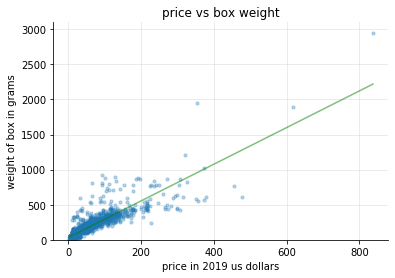

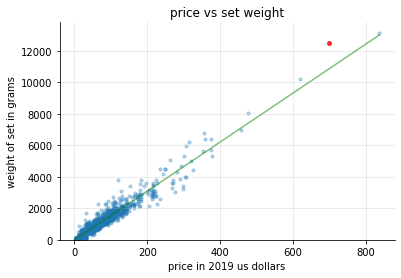

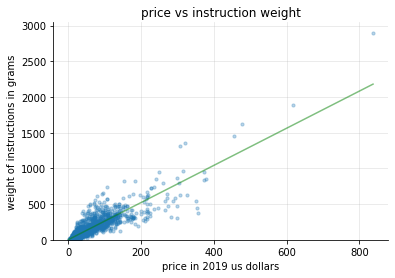

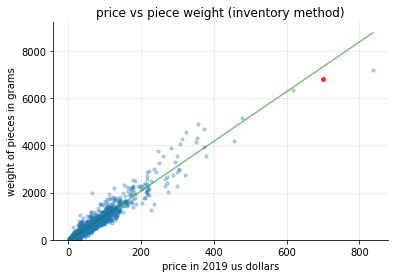

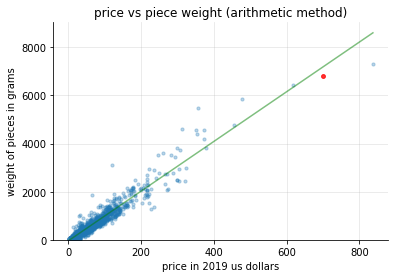

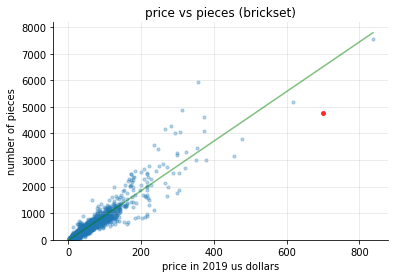

In [206]:
scatter_plot(
    df['adjusted_price'],
    df['box_weight'],
    'price vs box weight',
    'price in 2019 us dollars',
    'weight of box in grams',
)

scatter_plot(
    df['adjusted_price'],
    df['set_weight'],
    'price vs set weight',
    'price in 2019 us dollars',
    'weight of set in grams',
    [699.99],
    [12500.0],
)

scatter_plot(
    df['adjusted_price'],
    df['instruction_weight'],
    'price vs instruction weight',
    'price in 2019 us dollars',
    'weight of instructions in grams',
)

scatter_plot(
    df['adjusted_price'],
    df['parts_weight_inv'],
    'price vs piece weight (inventory method)',
    'price in 2019 us dollars',
    'weight of pieces in grams',
    [699.99],
    [6800.0],
)

scatter_plot(
    df['adjusted_price'],
    df['parts_weight_est'],
    'price vs piece weight (arithmetic method)',
    'price in 2019 us dollars',
    'weight of pieces in grams',
    [699.99],
    [6800.0],
)

scatter_plot(
    df['adjusted_price'],
    df['pieces'],
    'price vs pieces (brickset)',
    'price in 2019 us dollars',
    'number of pieces',
    [699.99],
    [4782.0],
)

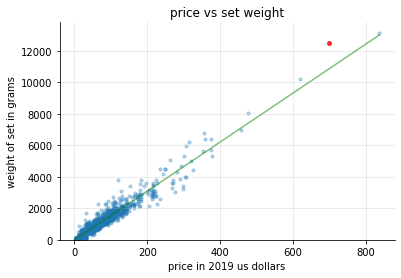

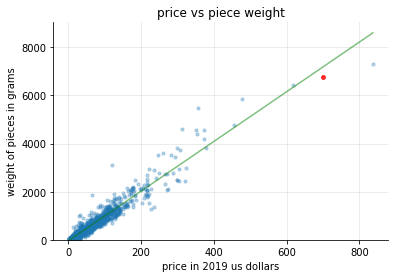

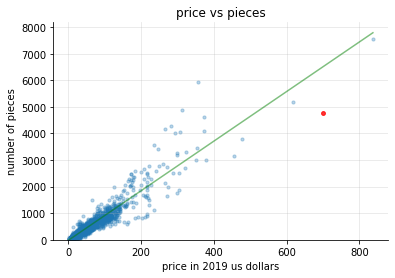

In [209]:
# remove mindstorms to see some nonsense

df_mindstorms = df[df['theme'].isin(['Mindstorms'])]
df_plot = df[~df['theme'].isin(['Mindstorms'])]

scatter_plot(
    df_plot['adjusted_price'],
    df_plot['set_weight'],
    'price vs set weight',
    'price in 2019 us dollars',
    'weight of set in grams',
    df_mindstorms['adjusted_price'].tolist() + [699.99],
    df_mindstorms['set_weight'].tolist() + [12500.0],
)

scatter_plot(
    df_plot['adjusted_price'],
    df_plot['parts_weight_est'],
    'price vs piece weight',
    'price in 2019 us dollars',
    'weight of pieces in grams',
    df_mindstorms['adjusted_price'].tolist() + [699.99],
    df_mindstorms['parts_weight_est'].tolist() + [6780.0],
)

scatter_plot(
    df_plot['adjusted_price'],
    df_plot['pieces'],
    'price vs pieces',
    'price in 2019 us dollars',
    'number of pieces',
    df_mindstorms['adjusted_price'].tolist() + [699.99],
    df_mindstorms['pieces'].tolist() + [4782.0],
)

In [211]:
df_ratios = df_adj[~df_adj['theme'].isin(excluded_themes)]
df_ratios['piece_weight_to_price'] = df_ratios['adjusted_price'] / df_ratios['parts_weight_est']
df_ratios['pieces_to_price'] = df_ratios['adjusted_price'] / df_ratios['pieces']
df_ratios['average_piece_weight'] = df_ratios['parts_weight_est'] / df_ratios['pieces']
df_ratios['year'] = df_ratios['year'].astype(int)

c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ivan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [212]:
def year_plot(df, col, title='', y_label=''):
    plt.plot(
        df.index,
        df[col],
    )
    plt.ylim(ymin=0)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    plt.ylabel(y_label)
    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.grid(axis='y', alpha=0.3)
    plt.show()

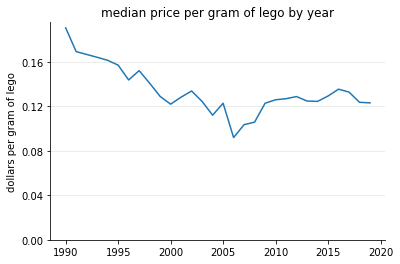

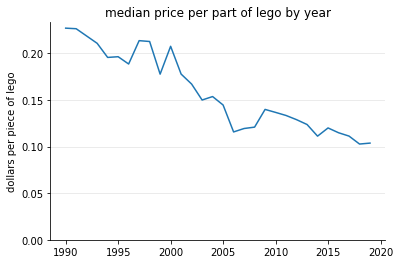

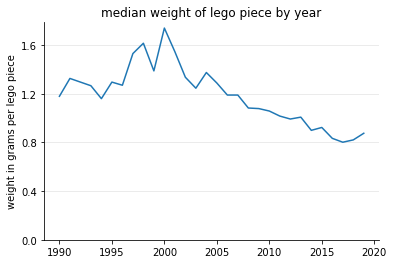

In [214]:
df_year = df_ratios.groupby('year')[[
    'piece_weight_to_price', 'pieces_to_price', 'pieces', 'parts_weight_est', 'adjusted_price', 'average_piece_weight'
]].median()

df_year = df_year[df_year.index >= 1990]
year_plot(
    df_year, 
    'piece_weight_to_price',
    'median price per gram of lego by year',
    'dollars per gram of lego'
)
year_plot(
    df_year,
    'pieces_to_price',
    'median price per part of lego by year',
    'dollars per piece of lego'
)
# year_plot(
#     df_year, 
#     'pieces'
# )
# year_plot(
#     df_year, 
#     'piece_weight'
# )
# year_plot(
#     df_year, 
#     'adjusted_price'
# )
year_plot(
    df_year, 
    'average_piece_weight',
    'median weight of lego piece by year',
    'weight in grams per lego piece'
)

how did we get here?

- stud muffin bricks on instagram
- http://anjsbrickblog.blogspot.com/2018/12/lego-star-wars-2019-ucs-set-details.html
- https://www.reddit.com/r/lego/comments/ae00sb/2019_d2c_set_list_posted_on_eurobricks/
- https://www.eurobricks.com/forum/index.php?/forums/topic/120925-fairground-sets-rumours-and-discussion/&page=20
- https://www.eurobricks.com/forum/index.php?/forums/topic/167577-lego-star-wars-2019-set-discussion-read-first-post/&page=52


appendix 1: merge brickset year csvs (not necessary to run analysis)

In [37]:
import os

brickset_path = 'sets-brickset'
list_dfs_brickset = []

for filename in os.listdir(brickset_path):
    list_dfs_brickset.append(
        pd.read_csv(os.path.join(brickset_path, filename))
    )

df_sets_brickset = pd.concat(list_dfs_brickset, ignore_index=True)

In [32]:
df_sets_brickset.to_csv('sets-brickset.csv', index=False)

appendix 2: getting the set weight (not necessary to run analysis)

In [27]:
# make a dict of part weights
df_part_weights = pd.read_csv('parts-bricklink.tsv', sep='\t')
dict_part_weights = {
    number: float(weight) for number, weight in zip(
        df_part_weights['Number'].tolist(),
        df_part_weights['Weight (in Grams)'].tolist()
    ) if weight != '?'
}

In [28]:
# get isd weight
df_isd_parts = pd.read_csv('set-inventories/75252-1.tsv', sep='\t')
df_isd_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_isd_parts['Type'].tolist()
]
sum(df_isd_parts['Item Name'] * df_isd_parts['part_weight'])

6781.290999999996

In [29]:
# validate this works with a known set
df_mf_parts = pd.read_csv('set-inventories/75192-1.tsv', sep='\t')
df_mf_parts['part_weight'] = [
    dict_part_weights[x] if x in dict_part_weights else 0.0 for x in df_mf_parts['Type'].tolist()
]
sum(df_mf_parts['Item Name'] * df_mf_parts['part_weight'])

7210.767999999998

appendix 3: computing inventory-derived attributes for all sets (not necessary to run analysis)

In [86]:
# computing additional set-level attributes

import os

sync_directory = 'set-inventories'
synced_sets = {s.split(".")[0] for s in os.listdir(sync_directory)}

In [89]:
def get_set_attributes(set_number):
    df = pd.read_csv(f'set-inventories/{set_number}.tsv', sep='\t', encoding='utf-8', index_col=False)
    df['Item No'] = df['Item No'].astype(str)
    num_part_types = len(df)
    num_parts = df['Qty'].sum()
    parts_weight = sum([ 
        dict_part_weights[part] * float(qty) if part in dict_part_weights else 0.0
        for part, qty in zip(df['Item No'].tolist(), df['Qty'].tolist())
    ])
    num_missing_parts = sum([
        qty if (part not in dict_part_weights) and ('stk' not in part) else 0.0 
        for part, qty in zip(df['Item No'].tolist(), df['Qty'].tolist())
    ])
    pct_missing_parts = num_missing_parts / num_parts
    return {
        'number': set_number,
        'num_part_types': num_part_types,
        'num_parts': num_parts,
        'parts_weight': parts_weight,
        'num_missing_parts': num_missing_parts,
        'pct_missing_parts': pct_missing_parts,
    }

fails = 0
inventory_data = []
for s in synced_sets:
    try:
        inventory_data.append(get_set_attributes(s))
    except:
        fails += 1
        if fails % 100 == 0:
            print(f'{fails} loads failed')

print(f'failed on {fails} sets')

# I believe almost all load fails are from html error pages when a set is not found

100 loads failed
200 loads failed
300 loads failed
400 loads failed
500 loads failed
600 loads failed
700 loads failed
800 loads failed
900 loads failed
1000 loads failed
1100 loads failed
1200 loads failed
1300 loads failed
1400 loads failed
1500 loads failed
1600 loads failed
1700 loads failed
1800 loads failed
1900 loads failed
2000 loads failed
failed on 2065 sets


In [92]:
cols = [
    'number',
    'num_part_types',
    'num_parts',
    'parts_weight',
    'num_missing_parts',
    'pct_missing_parts'
]
dict_cols = {}

for c in cols:
    dict_cols[c] = [s[c] for s in inventory_data]

df_inv = pd.DataFrame(dict_cols)
df_inv.to_csv('sets-bricklink-inventory-derived.csv', index=False)